In [70]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import pickle
from pylab import mpl
import pylab

In [71]:
file = open('../optimisation/utlis_data/exp_2_mean_batch', 'rb')
batch = pickle.load(file)
file.close()

file = open('../optimisation/utlis_data/exp_2_mean_seq', 'rb')
seq = pickle.load(file)
file.close()


In [72]:
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'winter' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 500 #图片像素
plt.rcParams['figure.dpi'] = 500 #分辨率

In [73]:
params = {
        "font.size": 12,     # 全局字号
        'font.family':'STIXGeneral', # 全局字体
        "figure.subplot.wspace":0.2, # 图-子图-宽度百分比
        "figure.subplot.hspace":0.4, # 图-子图-高度百分比
        "axes.spines.right":True,  # 坐标系-右侧线
        "axes.spines.top":True,   # 坐标系-上侧线
        "axes.titlesize":12,   # 坐标系-标题-字号
        "axes.labelsize": 12,  # 坐标系-标签-字号
        "legend.fontsize": 8,  # 图例-字号
        "xtick.labelsize": 10,  # 刻度-标签-字号
        "ytick.labelsize": 10,  # 刻度-标签-字号
        "xtick.direction":'out',   # 刻度-方向
        "ytick.direction":'out'  # 刻度-方向
}
pylab.rcParams.update(params)            #set figure parameter


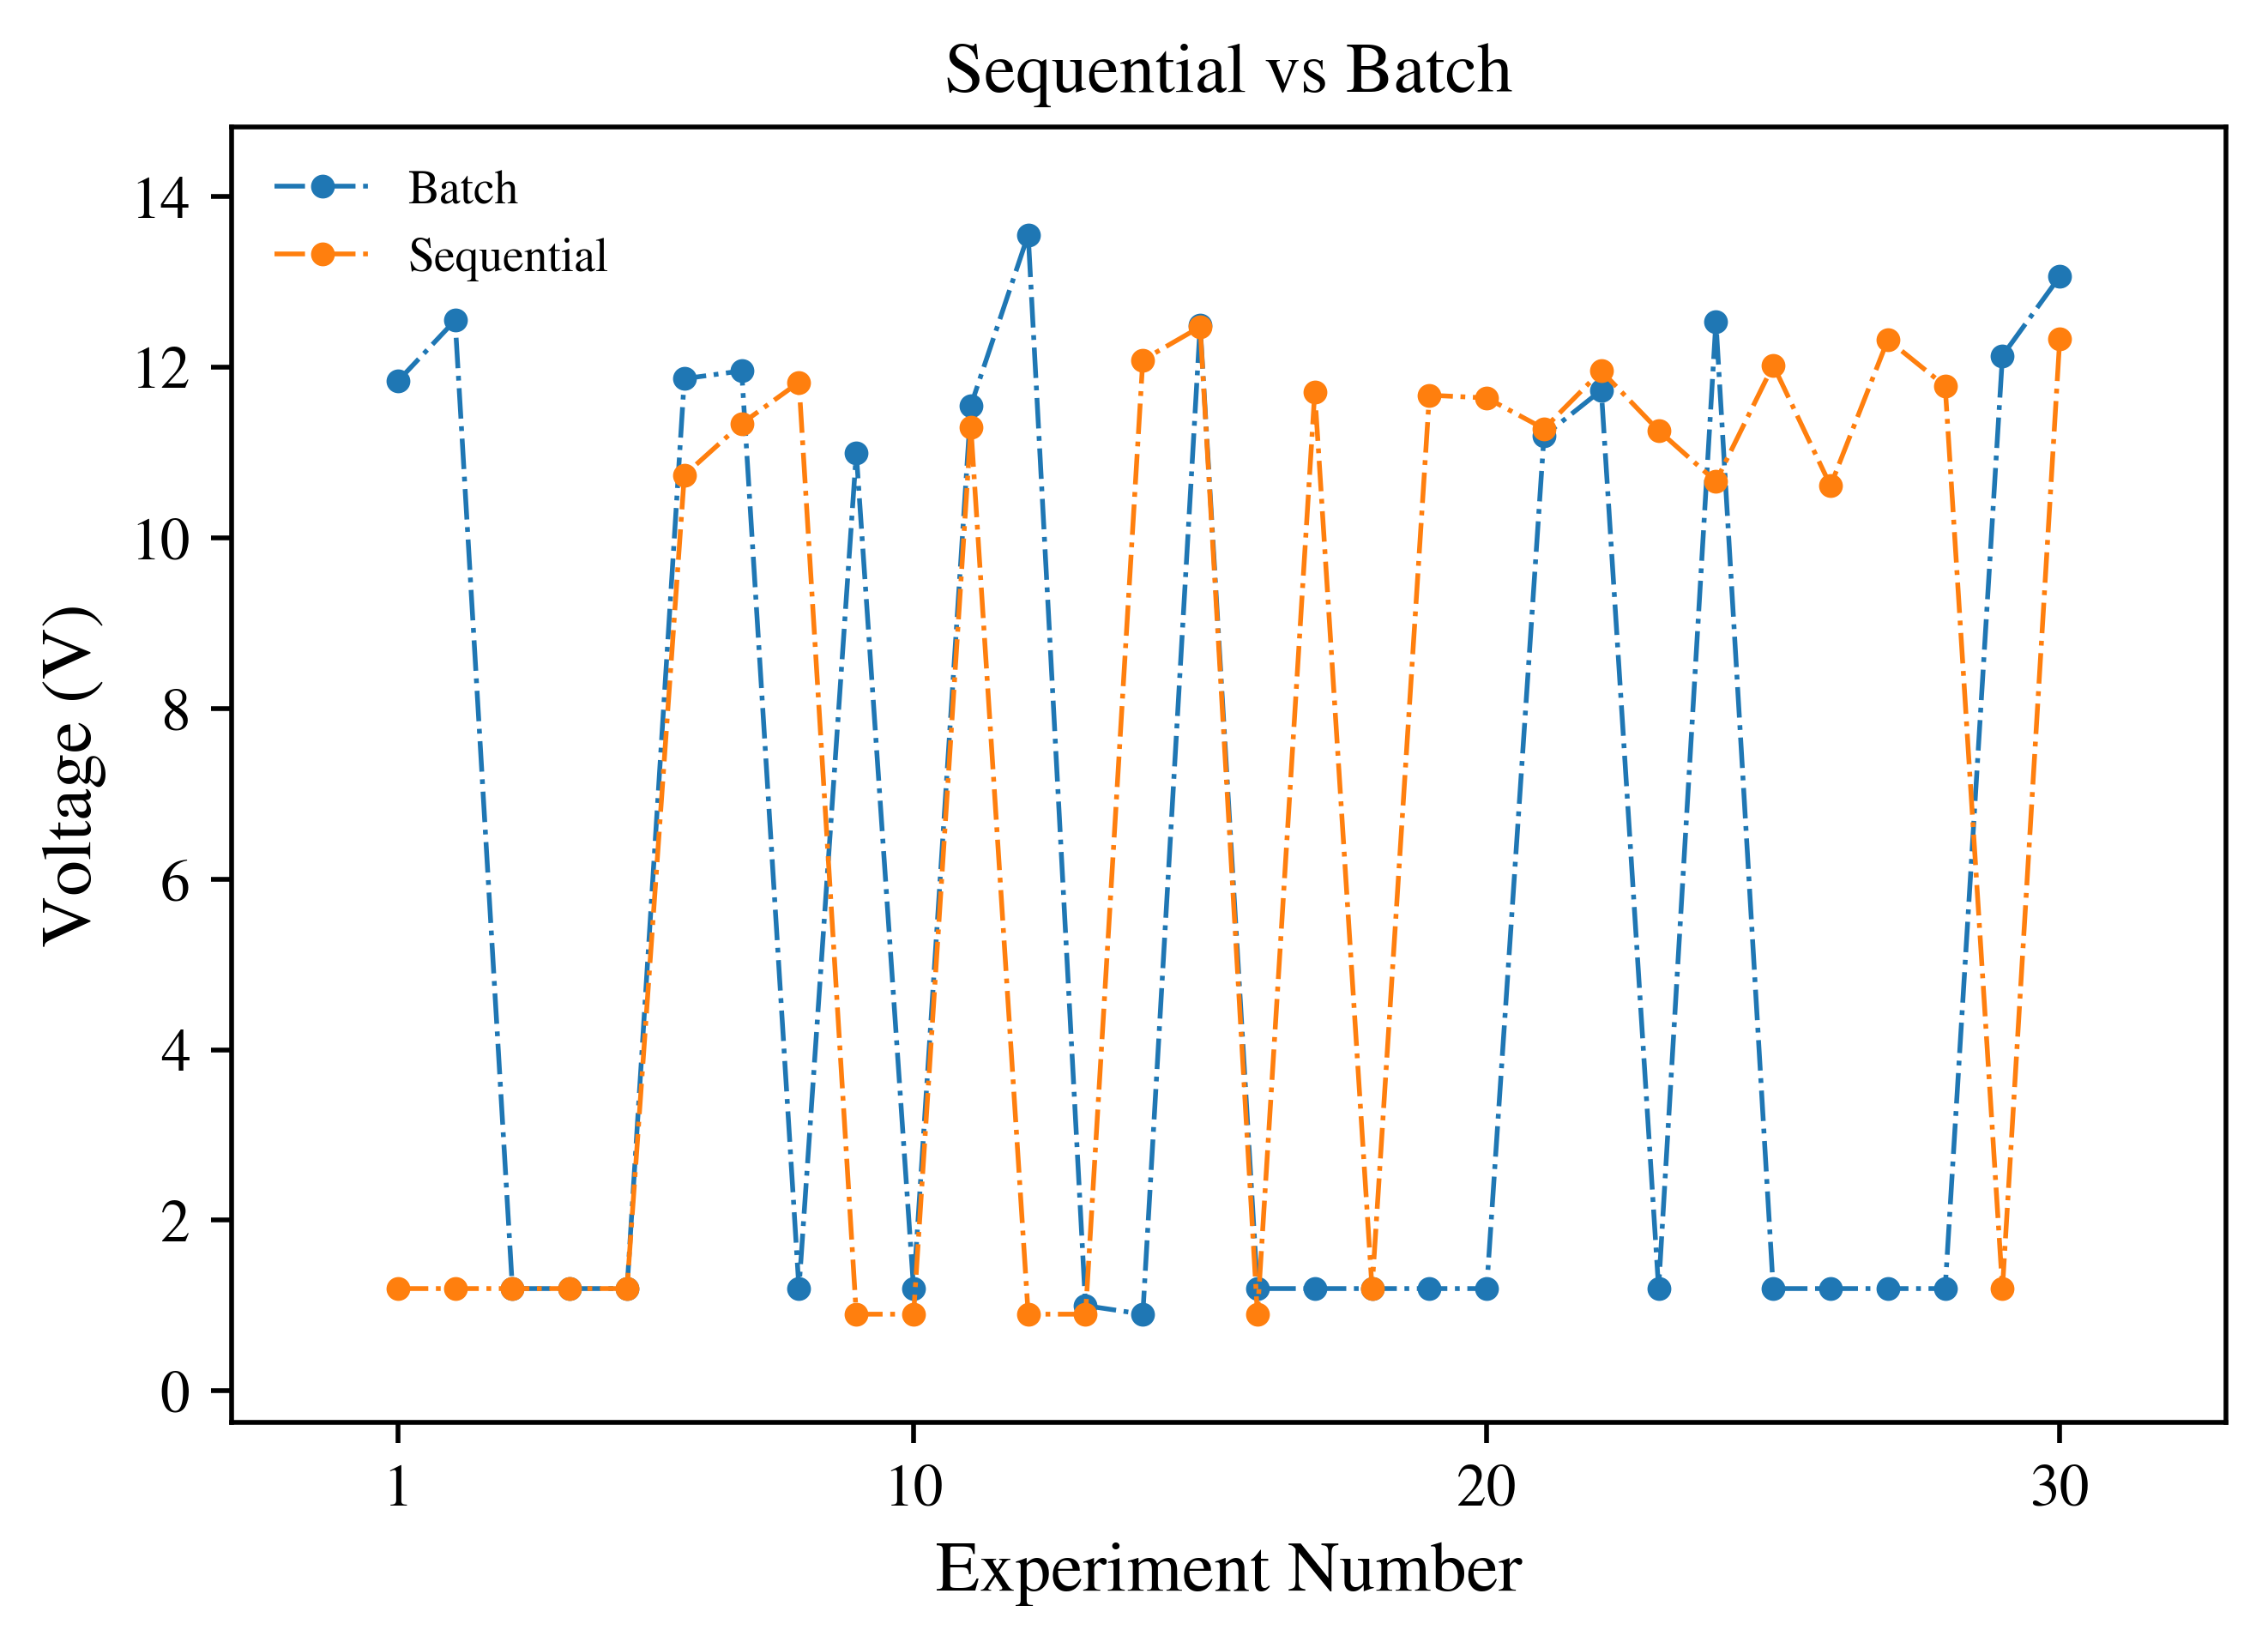

In [85]:
x_axis = np.linspace(1,30,30)
x = [1, 10, 20, 30]
batach_v = batch.value
seq_v = seq.value
fig,ax = plt.subplots()
ax.figsize=(48,48)

# plt.plot(x, prob_11, prob_12)
# ax.set_xmargin(2)
ax.set_xticks(x)
ax.plot(x_axis, batach_v,'.-.', label='Batch', linewidth=0.8)
ax.plot(x_axis, seq_v,'.-.', label='Sequential', linewidth=0.8)
ax.margins(0.1)

plt.legend(frameon=False, loc="best")


ax.set_xlabel("Experiment Number")
ax.set_ylabel("Voltage (V)")
ax.set_title("Sequential vs Batch")

fig.savefig('Sequential vs Batch.pdf', dpi=500,bbox_inches = 'tight')
fig.savefig('Sequential vs Batch.svg', dpi=500,bbox_inches = 'tight')
fig.savefig('Sequential vs Batch.jpg', dpi=500,bbox_inches = 'tight')

In [75]:
print(batach_v.var())
print(seq_v.var())

30.620815732683436
27.747825067795805


In [76]:
ba = np.zeros([30, 5])
se = np.zeros([30, 5])

for i in range(30):
    for j in range(5):
        ba[i][j] = batch.ht[i][j]

for i in range(30):
    for j in range(5):
        se[i][j] = seq.ht[i][j]        

print(ba.var())
print(se.var())

0.2496
0.20728888888888886


In [77]:
ba = np.zeros([30, 3])
se = np.zeros([30, 3])

for i in range(30):
    for j in range(3):
        ba[i][j] = batch.zt[i][5 + j]

for i in range(30):
    for j in range(3):
        se[i][j] = seq.zt[i][5 + j]        

print(ba.var())
print(se.var())

27.34701957699513
23.538150107592283


In [78]:
ba = np.zeros([30, 8])
se = np.zeros([30, 8])

for i in range(30):
    for j in range(8):
        ba[i][j] = batch.zt[i][j]

for i in range(30):
    for j in range(8):
        se[i][j] = seq.zt[i][j]        

print(ba.var())
print(se.var())



10.461148935478407
9.049988277411565


In [79]:
ba = np.zeros([30, 1])
se = np.zeros([30, 1])

for i in range(30):
        ba[i] = batch.zt[i][5]

for i in range(30):
        se[i] = seq.zt[i][5]        

print(ba.var())
print(se.var())


1.145930326161399
0.6665117792395144


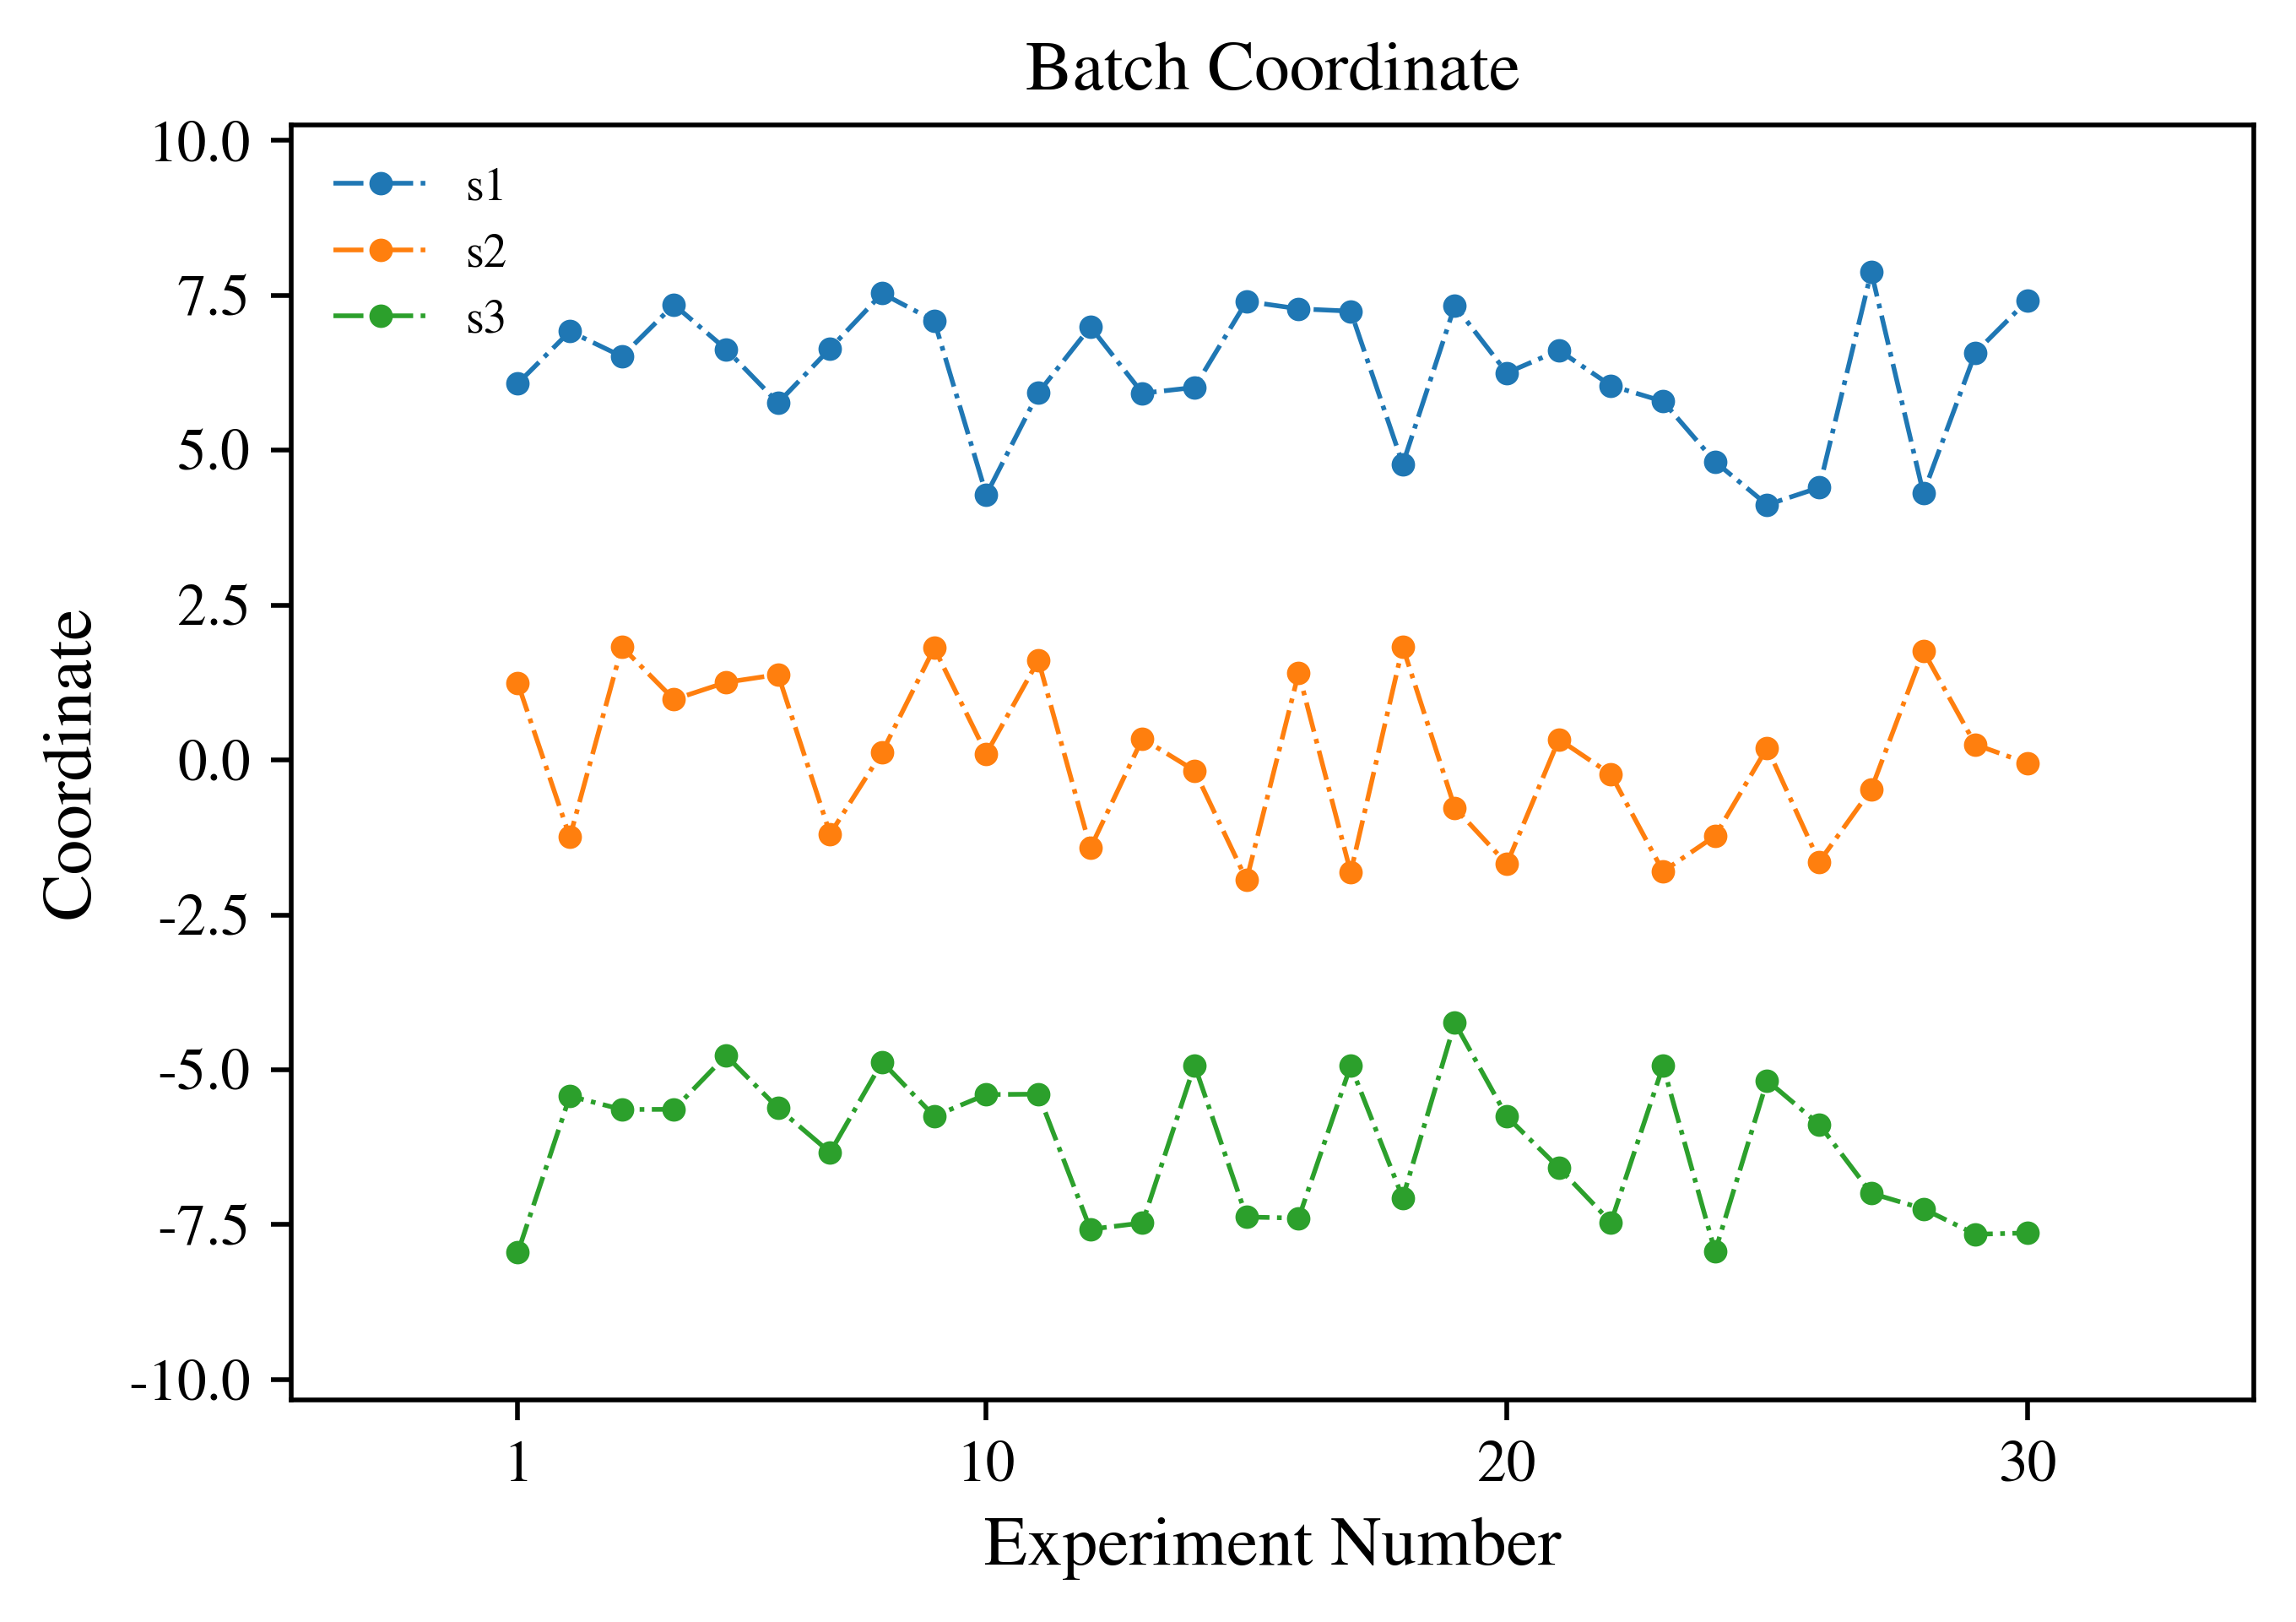

In [86]:
fig,ax = plt.subplots()

xt_1 = []
xt_2 = []
xt_3 = []
x_axis = np.linspace(1,30,30)


for i in range(30):
    xt_1.append(batch.zt[i][5])
    xt_2.append(batch.zt[i][6])
    xt_3.append(batch.zt[i][7])


ax_1 = plt.subplot(111)
ax_1.plot(x_axis, xt_1,ls='-.', marker='.', label='s1', linewidth=0.8)
ax_1.plot(x_axis, xt_2,ls='-.', marker='.', label='s2', linewidth=0.8)
ax_1.plot(x_axis, xt_3,ls='-.', marker='.', label='s3', linewidth=0.8)
ax_1.margins(0.15)
plt.xticks(x)
plt.legend(frameon=False, loc='best')
ax_1.set_xlabel("Experiment Number")
ax_1.set_ylabel("Coordinate")
ax_1.set_title("Batch Coordinate")

fig.savefig('Batch coordinate.pdf', dpi=500,bbox_inches = 'tight')
fig.savefig('Batch coordinate.svg', dpi=500,bbox_inches = 'tight')
fig.savefig('Batch coordinate.jpg', dpi=500,bbox_inches = 'tight')

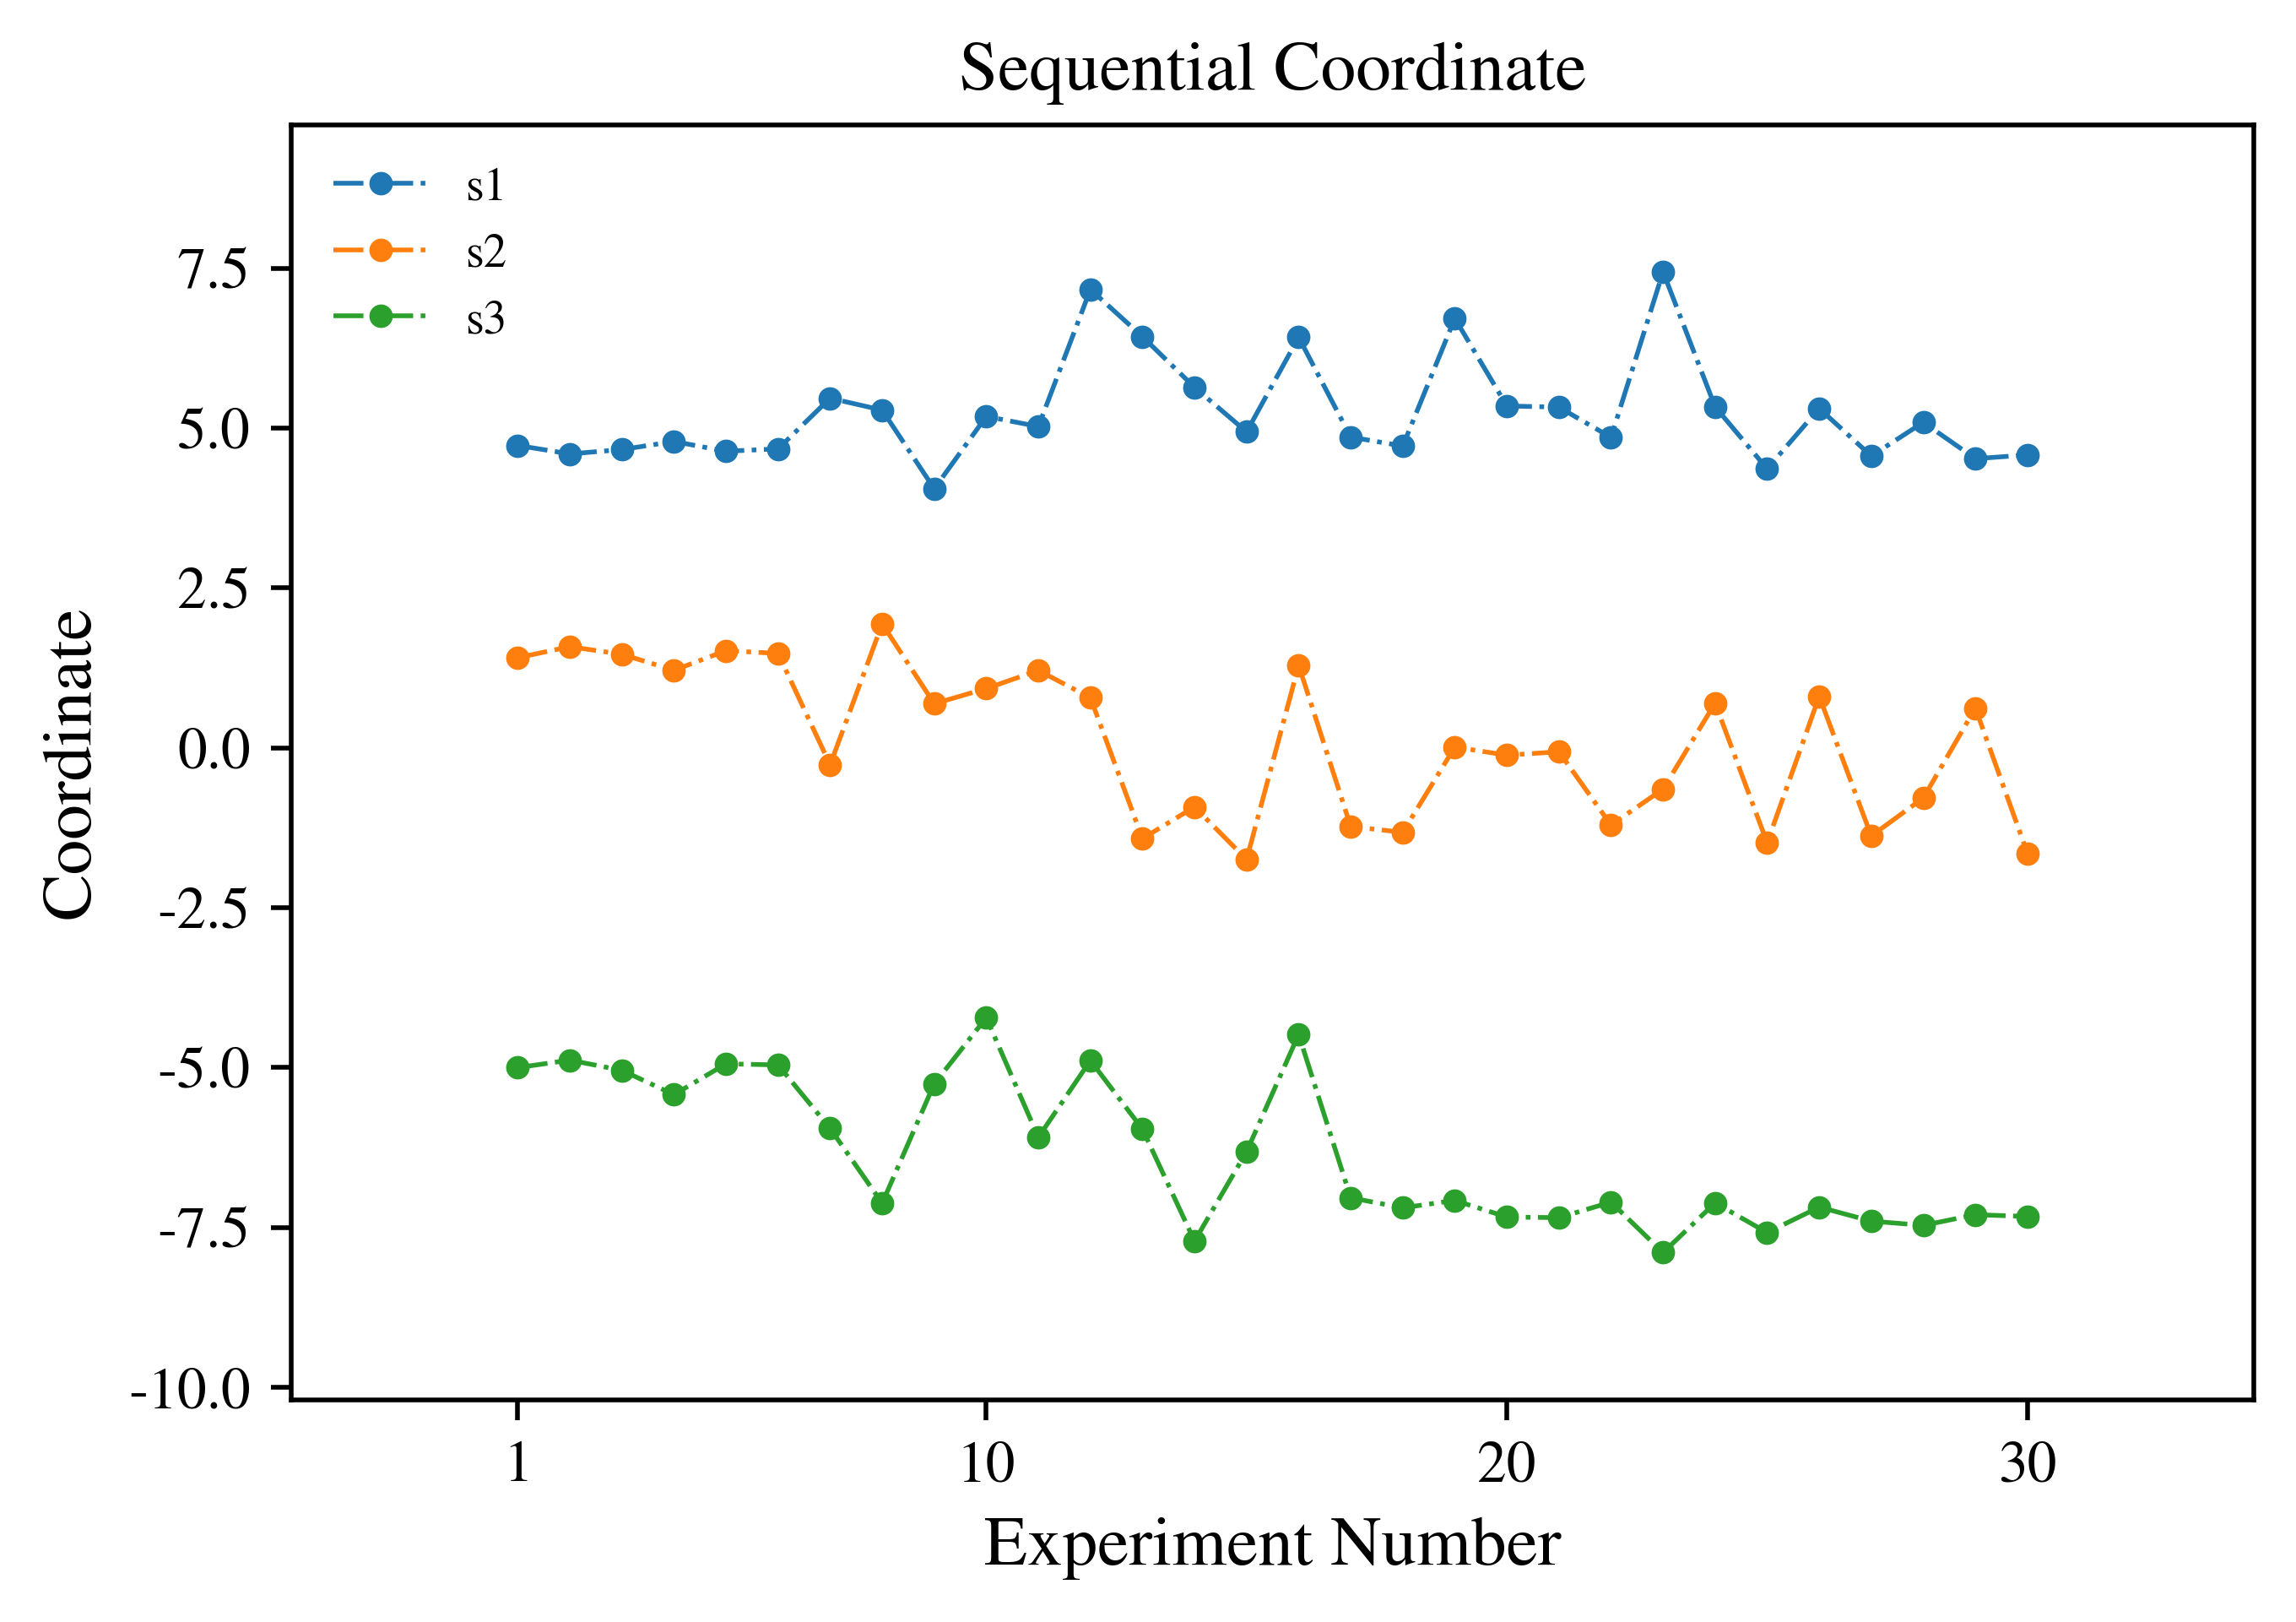

In [87]:
fig,ax = plt.subplots()


xt_1 = []
xt_2 = []
xt_3 = []
x_axis = np.linspace(1,30,30)
# y = []

for i in range(30):
    xt_1.append(seq.zt[i][5])
    xt_2.append(seq.zt[i][6])
    xt_3.append(seq.zt[i][7])


ax_1 = plt.subplot(111)
ax_1.plot(x_axis, xt_1,ls='-.', marker='.', label='s1', linewidth=0.8)
ax_1.plot(x_axis, xt_2,ls='-.', marker='.', label='s2', linewidth=0.8)
ax_1.plot(x_axis, xt_3,ls='-.', marker='.', label='s3', linewidth=0.8)

ax_1.margins(0.15)
plt.xticks(x)

plt.legend(frameon=False, loc='upper left')
ax_1.set_xlabel("Experiment Number")
ax_1.set_ylabel("Coordinate")
ax_1.set_title("Sequential Coordinate")

fig.savefig('Sequential coordinate.pdf', dpi=500,bbox_inches = 'tight')
fig.savefig('Sequential coordinate.svg', dpi=500,bbox_inches = 'tight')
fig.savefig('Sequential coordinate.jpg', dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Sequential Coordinate')

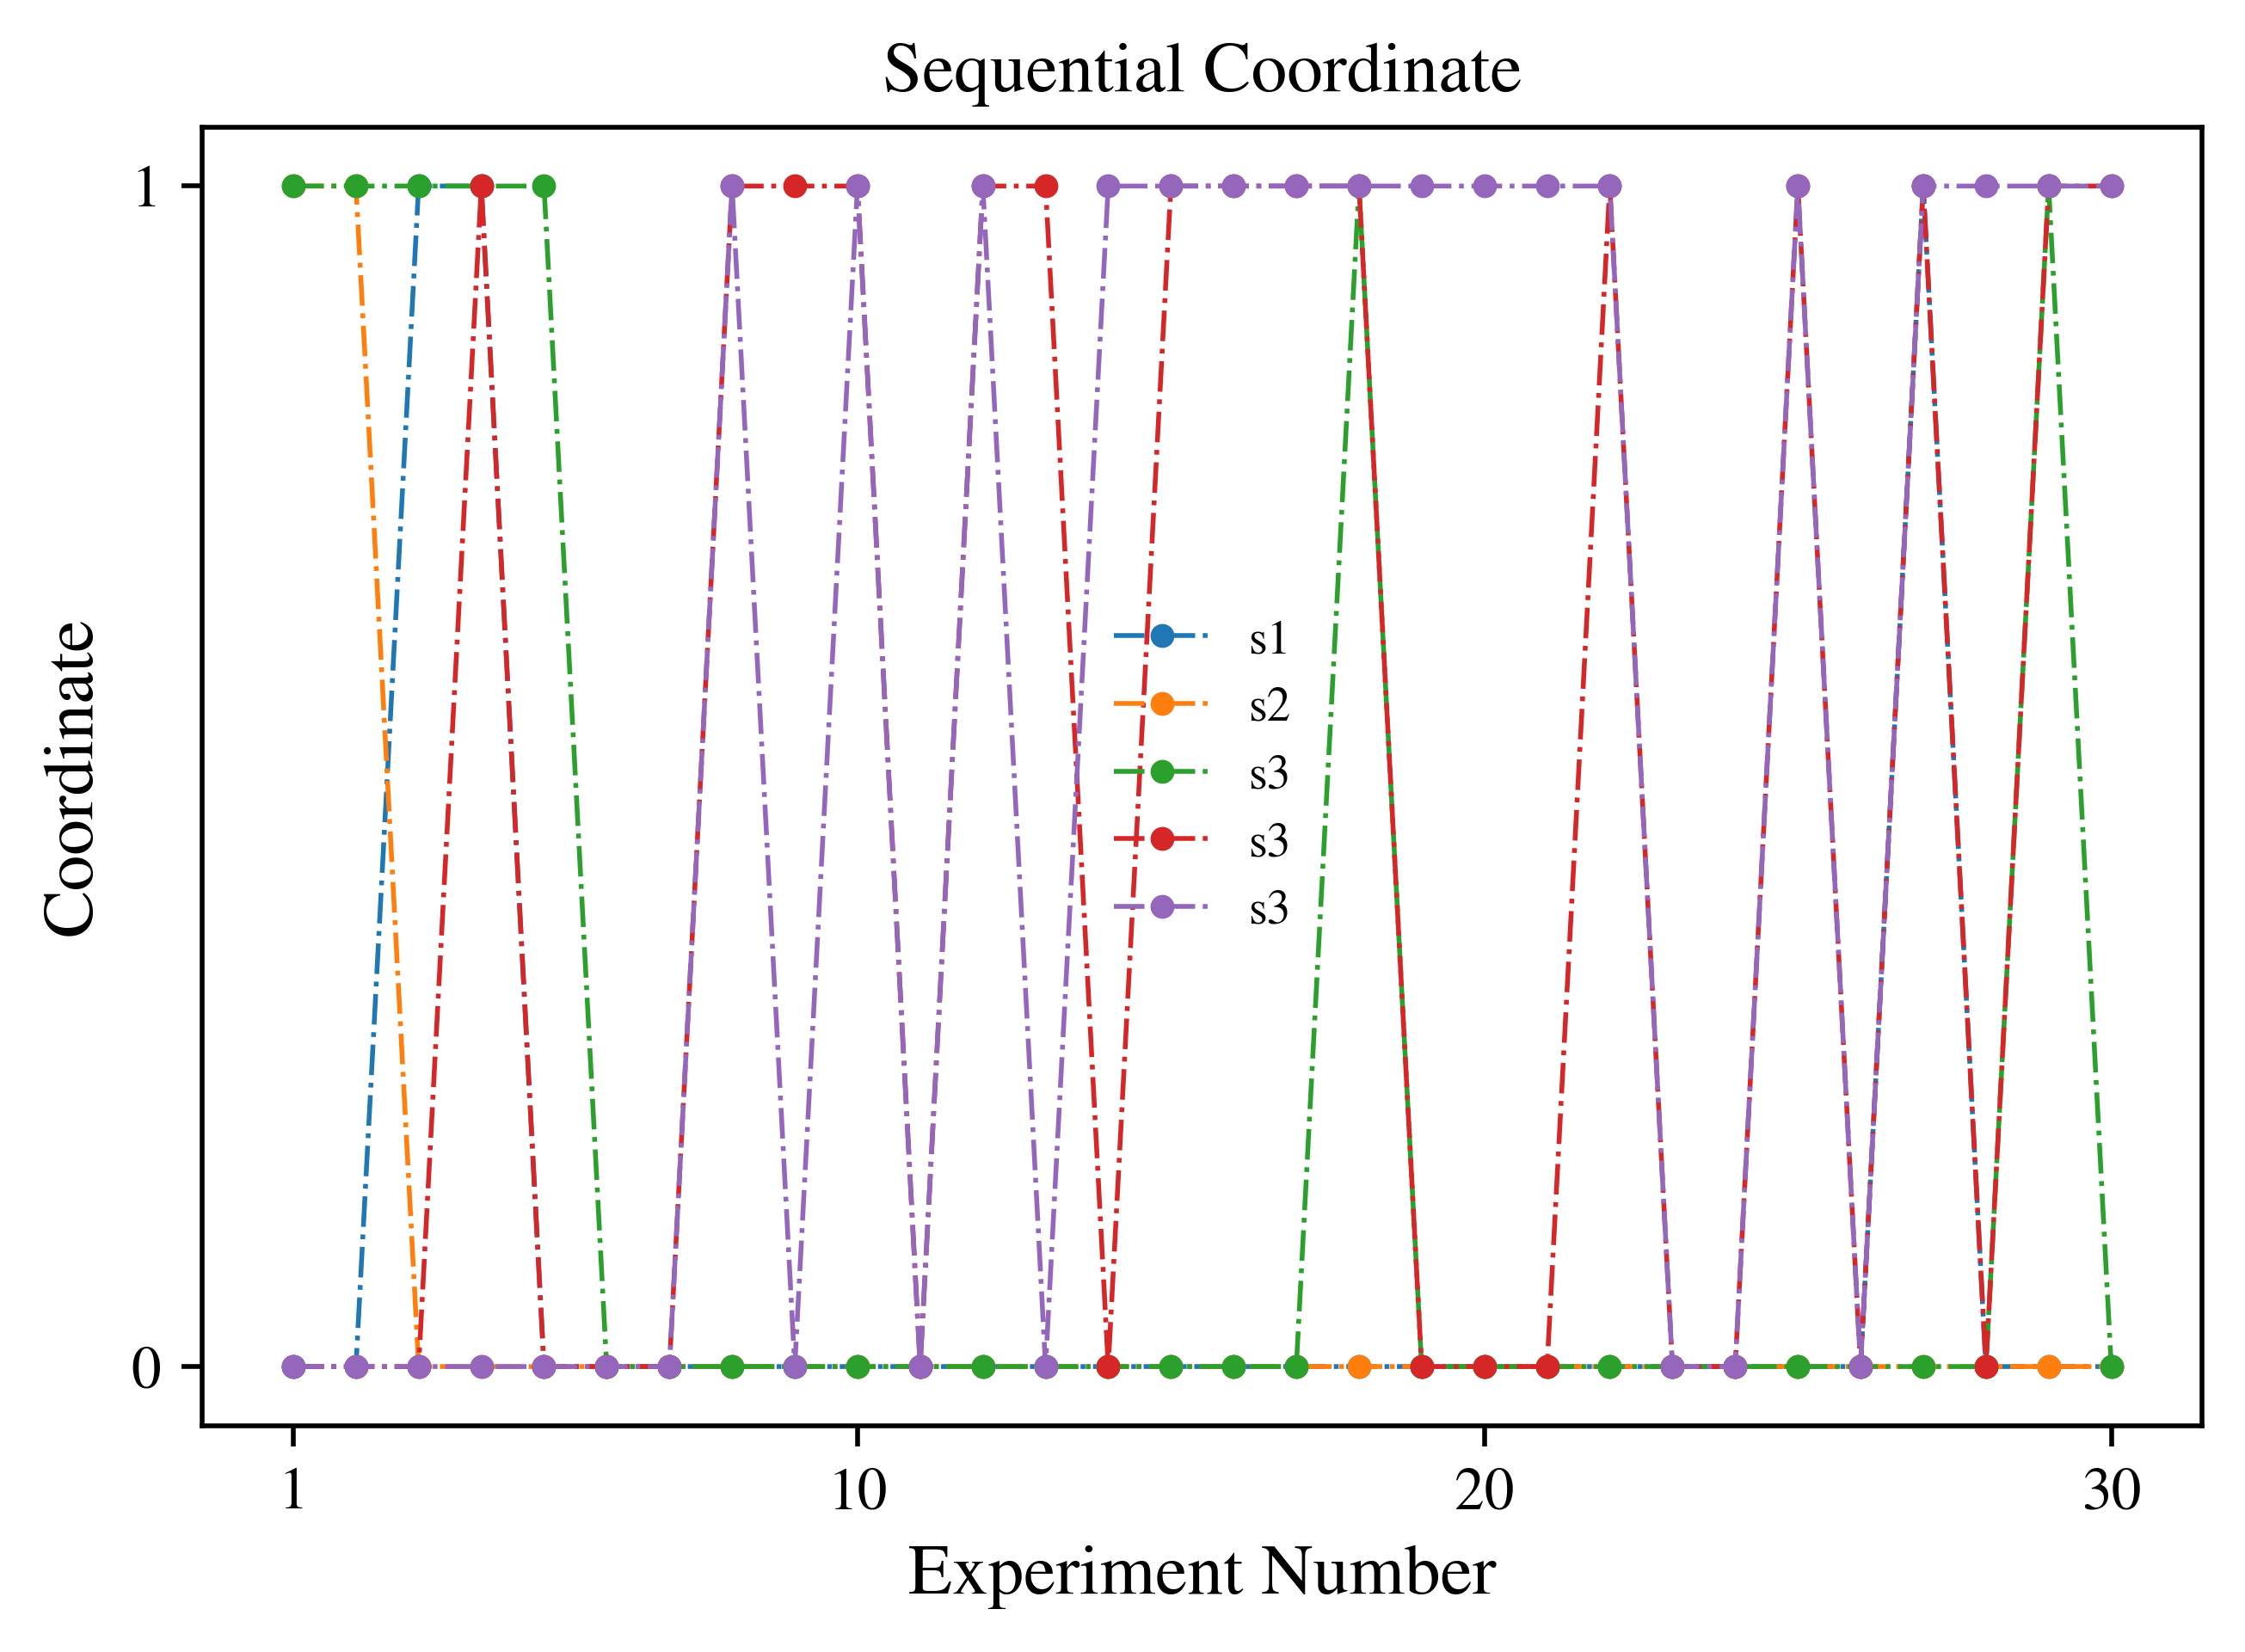

In [88]:
s_1 = []
s_2 = []
s_3 = []
s_4 = []
s_5 = []

x_axis = np.linspace(1,30,30)
y = [0, 1]

for i in range(30):
    s_1.append(seq.zt[i][0])
    s_2.append(seq.zt[i][1])
    s_3.append(seq.zt[i][2])
    s_4.append(seq.zt[i][3])
    s_5.append(seq.zt[i][4])


ax_1 = plt.subplot(111)
ax_1.plot(x_axis, s_1,ls='-.', marker='.', label='s1', linewidth=0.8)
ax_1.plot(x_axis, s_2,ls='-.', marker='.', label='s2', linewidth=0.8)
ax_1.plot(x_axis, s_3,ls='-.', marker='.', label='s3', linewidth=0.8)
ax_1.plot(x_axis, s_4,ls='-.', marker='.', label='s3', linewidth=0.8)
ax_1.plot(x_axis, s_5,ls='-.', marker='.', label='s3', linewidth=0.8)

# ax_1.margins(0.15)
plt.xticks(x)
plt.yticks(y)


plt.legend(frameon=False, loc='best')
ax_1.set_xlabel("Experiment Number")
ax_1.set_ylabel("Coordinate")
ax_1.set_title("Sequential Coordinate")

# fig.savefig('Sequential coordinate.pdf', dpi=500,bbox_inches = 'tight')
# fig.savefig('Sequential coordinate.svg', dpi=500,bbox_inches = 'tight')

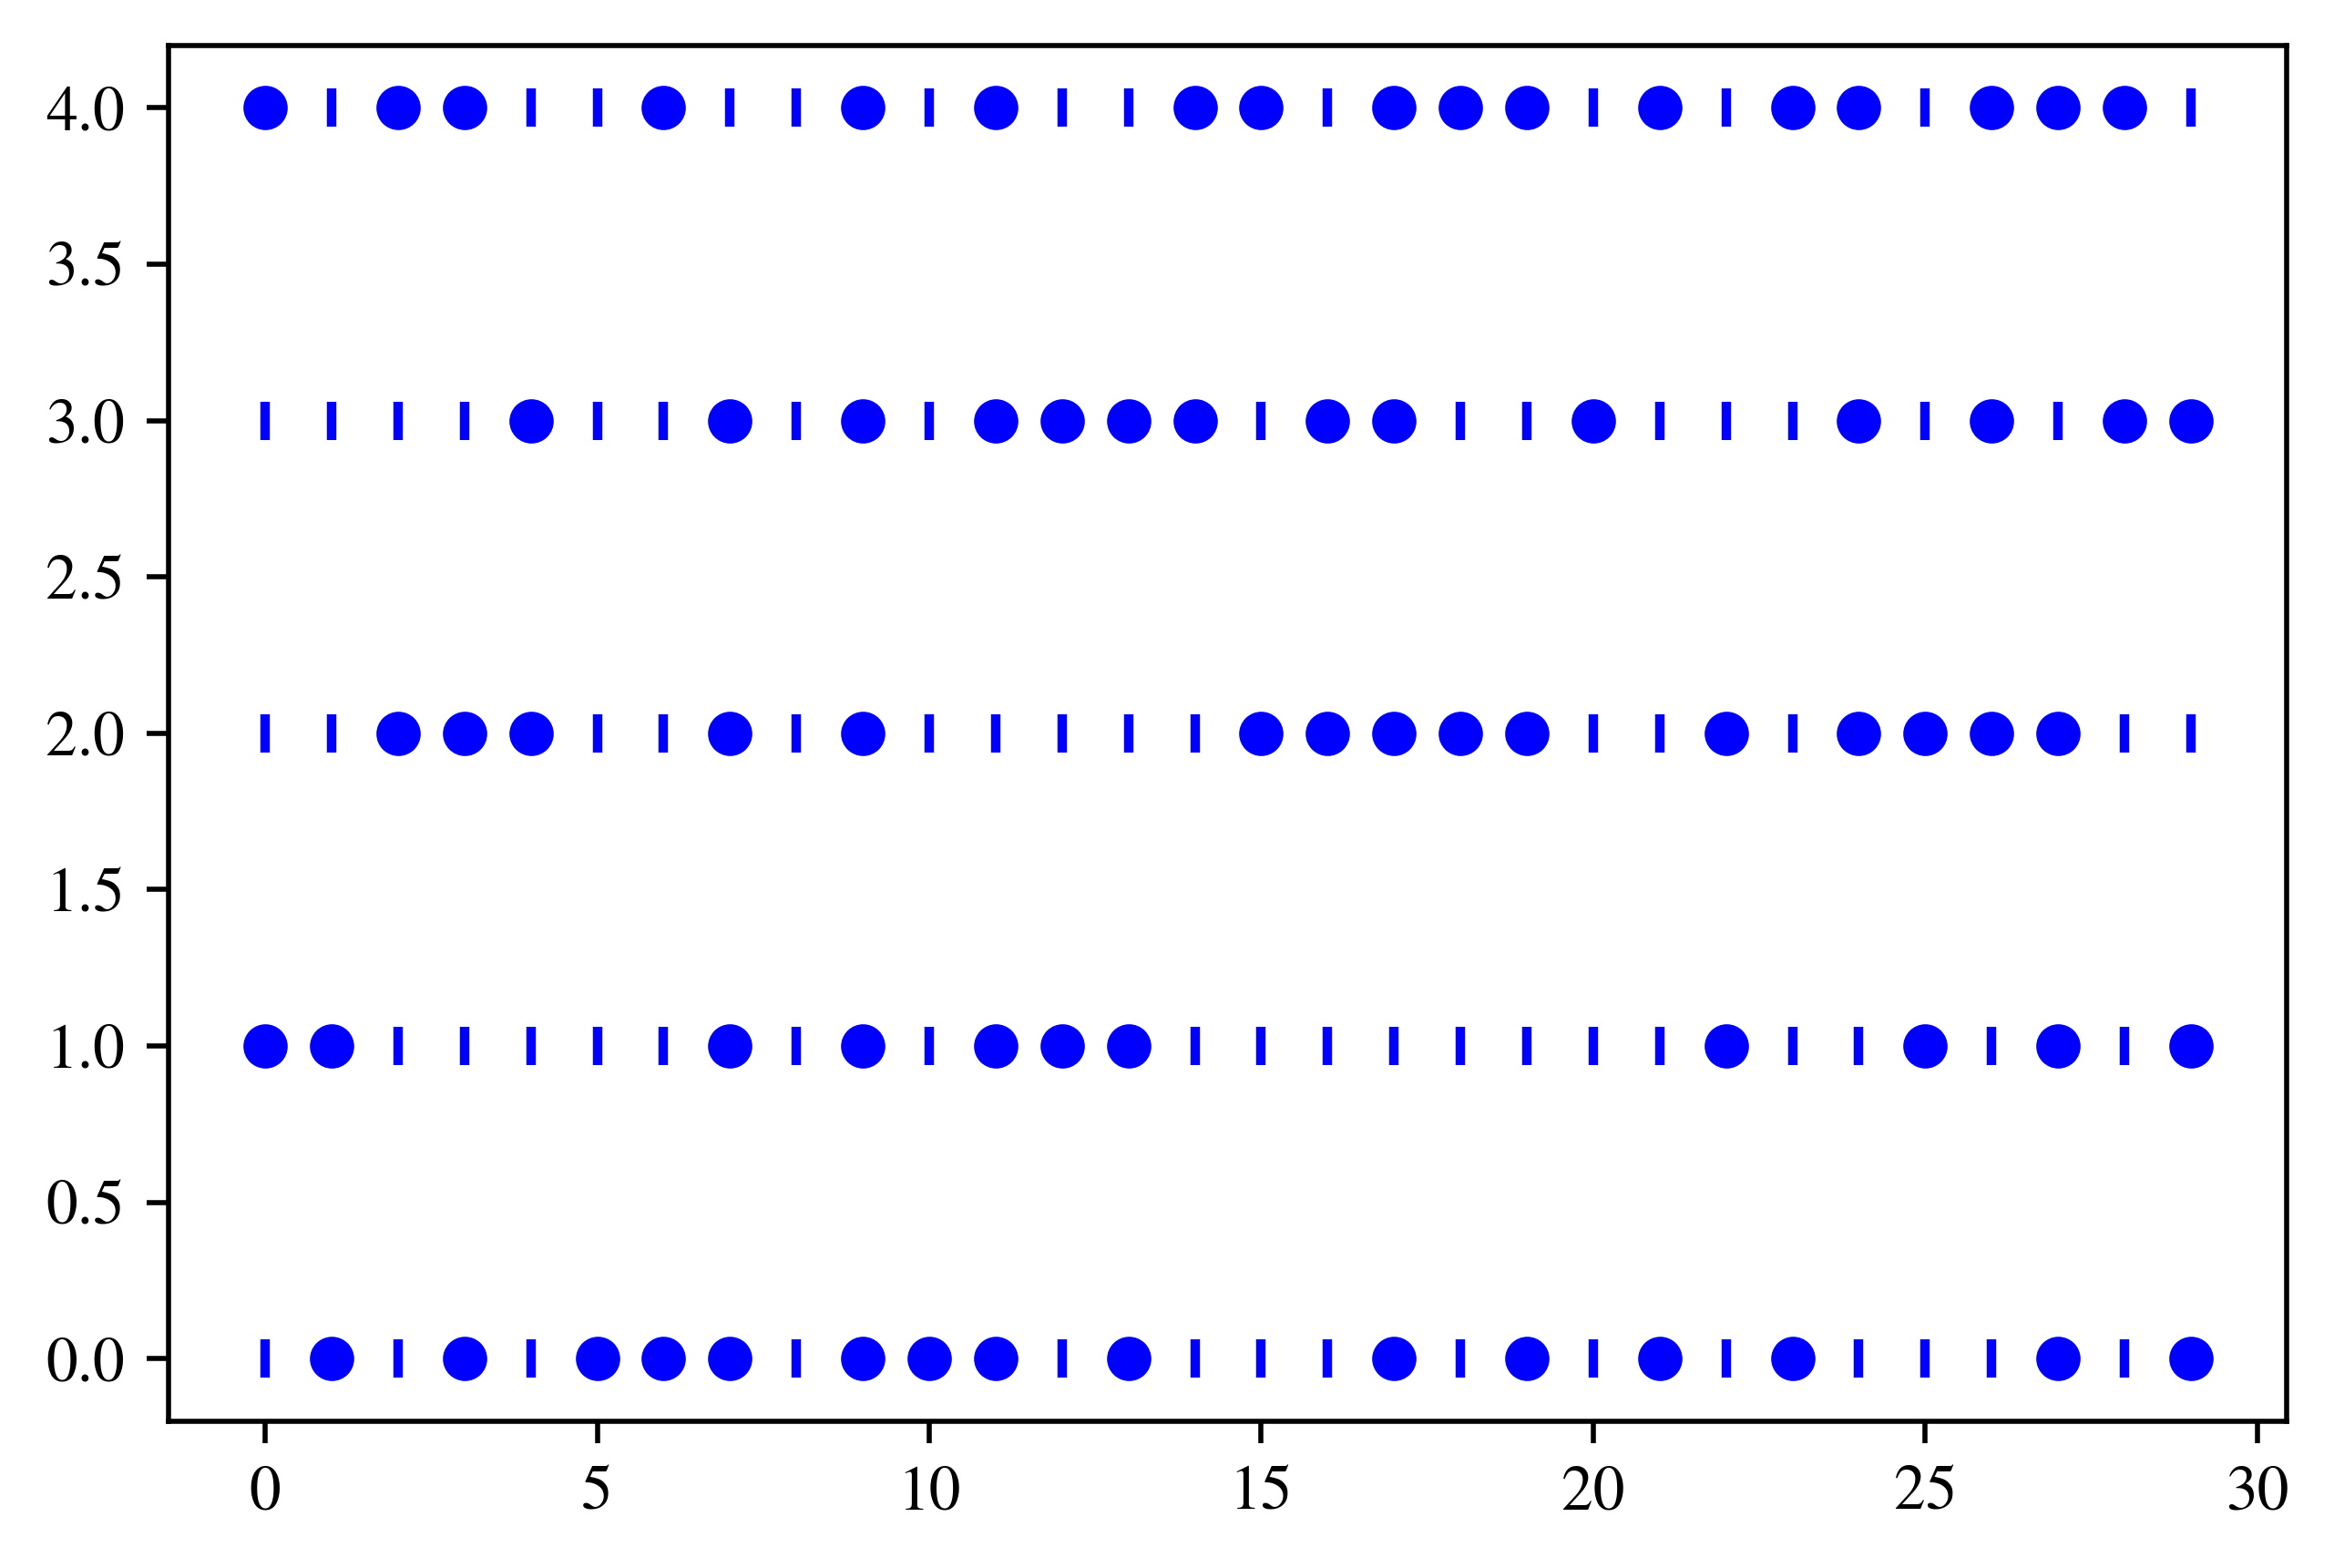

In [90]:
ax = plt.subplot(111)

for i in range(30):
    y = 0
    if batch.zt[i][0] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if batch.zt[i][0] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')  
        
for i in range(30):
    y = 1
    if batch.zt[i][1] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if batch.zt[i][1] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')  

for i in range(30):
    y = 2
    if batch.zt[i][2] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if batch.zt[i][2] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b') 
        
for i in range(30):
    y = 3
    if batch.zt[i][3] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if batch.zt[i][3] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')
        
for i in range(30):
    y = 4
    if batch.zt[i][4] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if batch.zt[i][4] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')

        

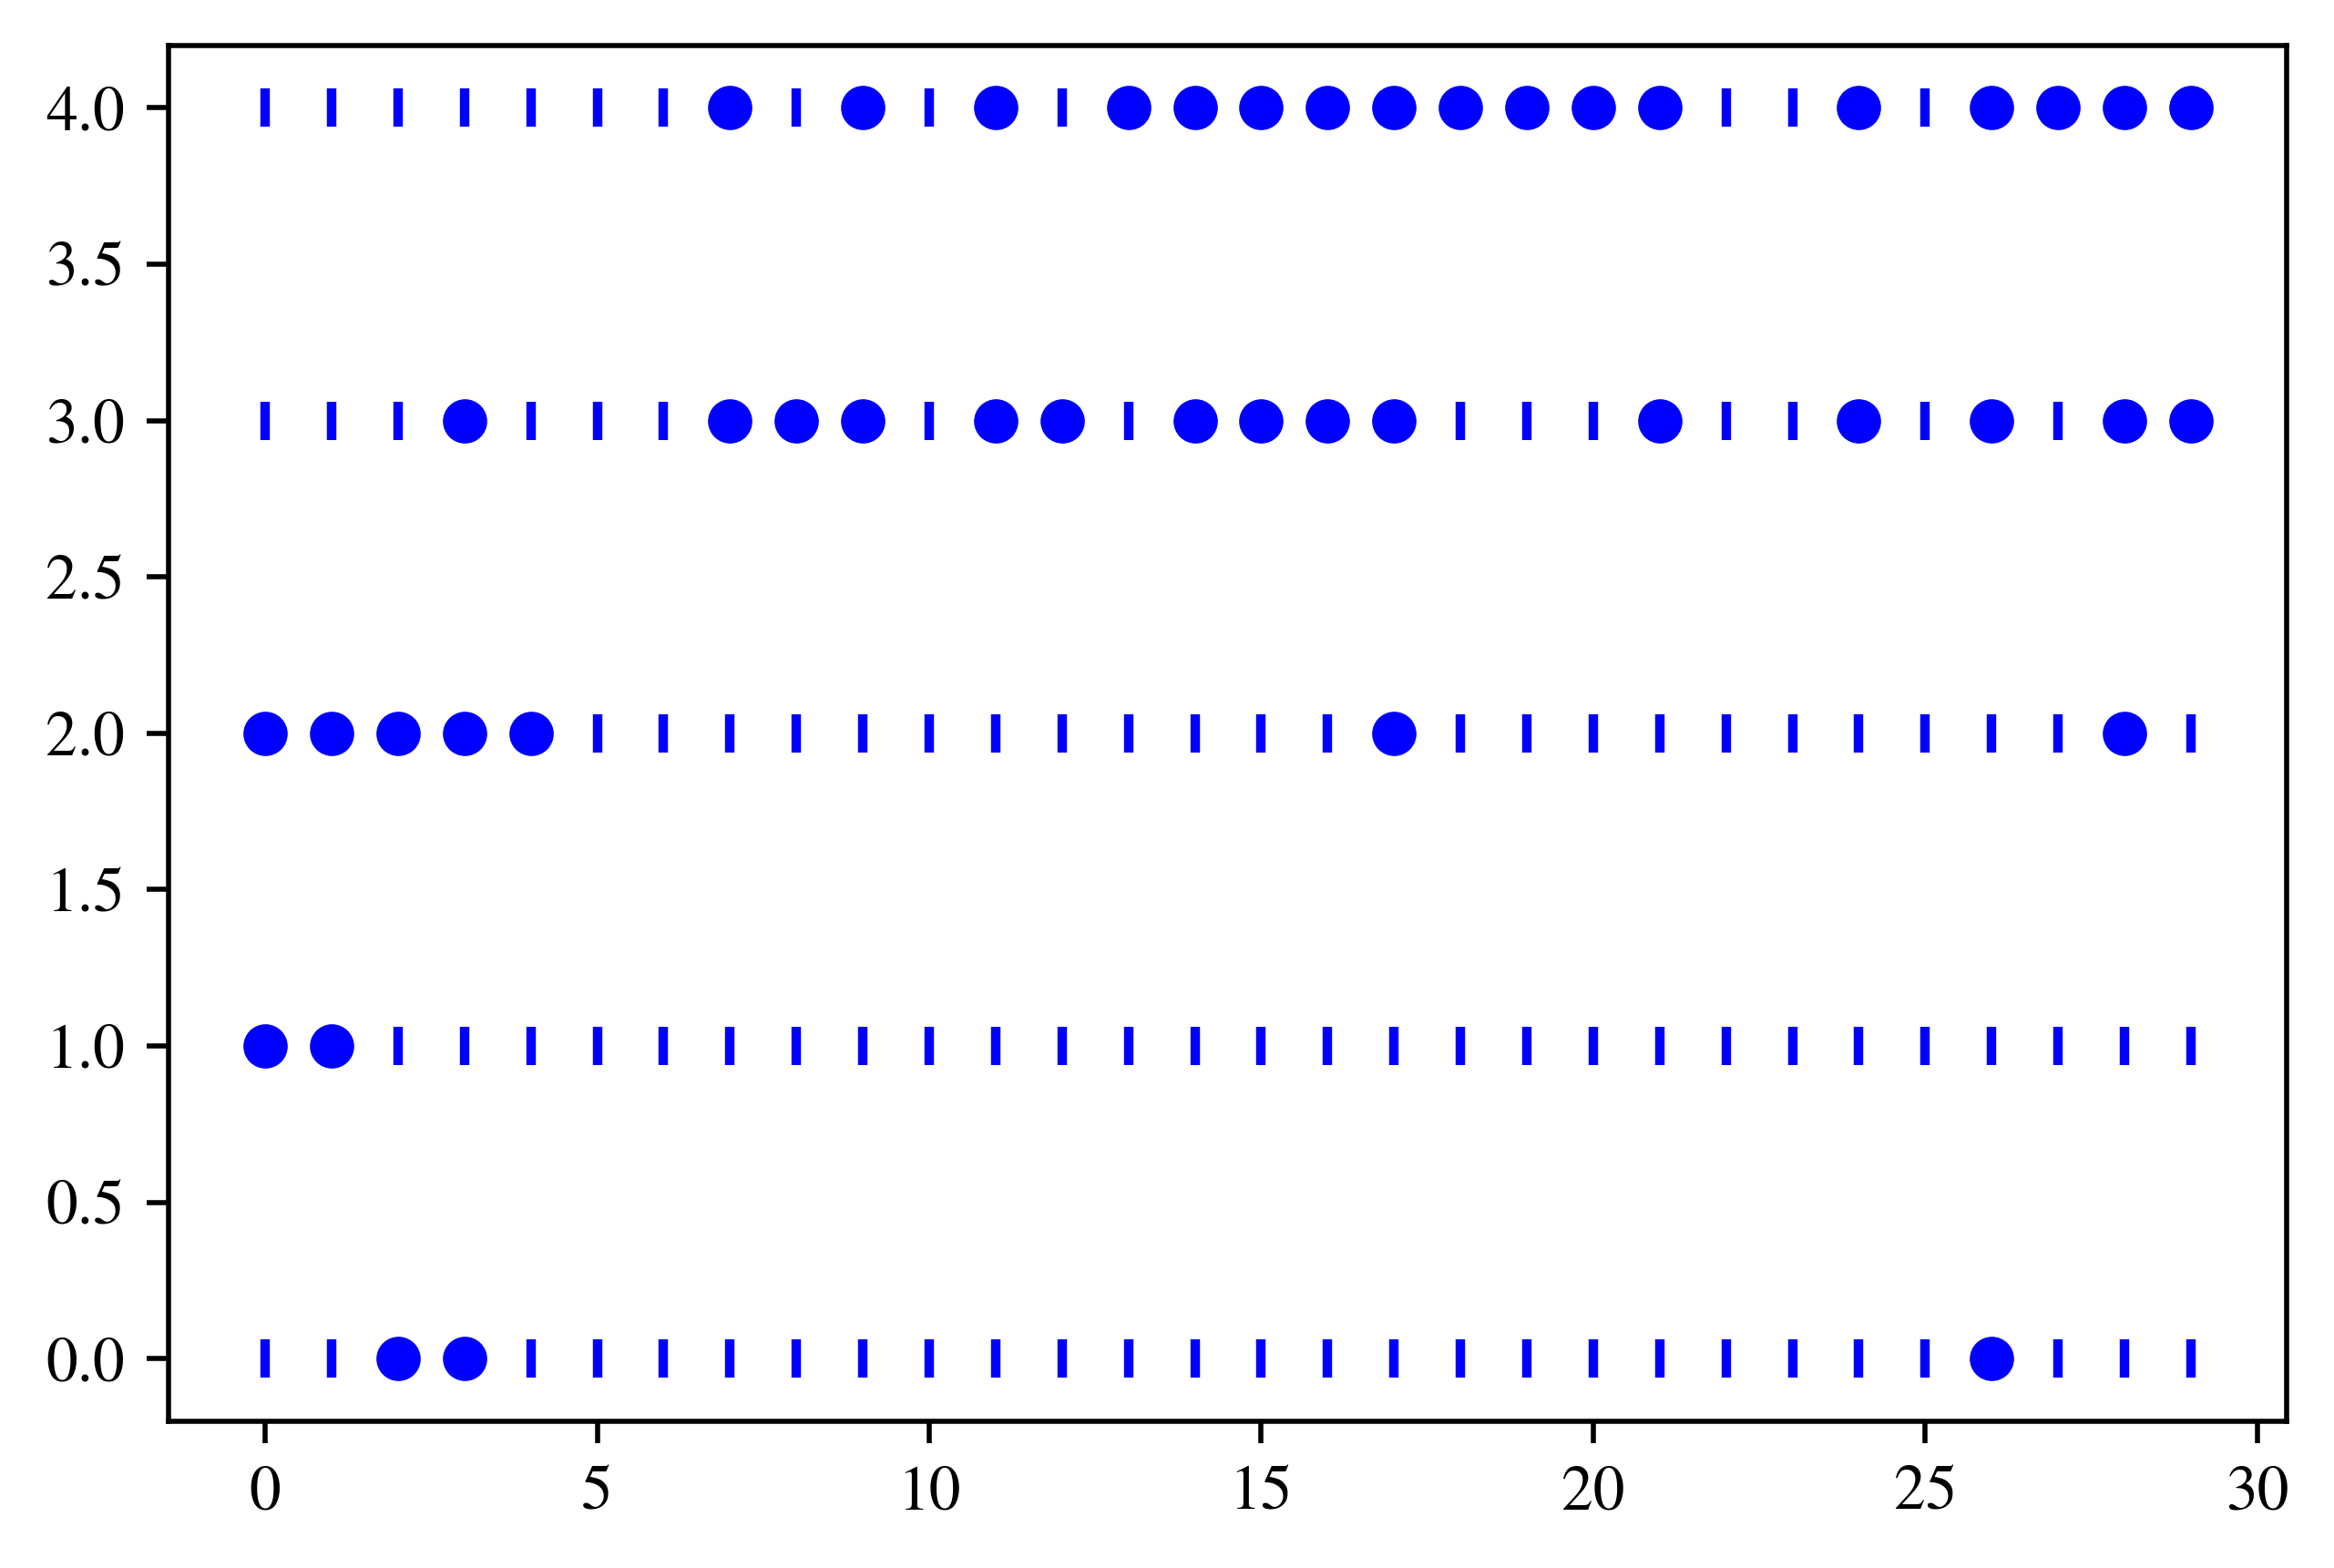

In [91]:
ax = plt.subplot(111)

for i in range(30):
    y = 0
    if seq.zt[i][0] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if seq.zt[i][0] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')  
        
for i in range(30):
    y = 1
    if seq.zt[i][1] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if seq.zt[i][1] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')  

for i in range(30):
    y = 2
    if seq.zt[i][2] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if seq.zt[i][2] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b') 
        
for i in range(30):
    y = 3
    if seq.zt[i][3] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if seq.zt[i][3] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')
        
for i in range(30):
    y = 4
    if seq.zt[i][4] == 0:
        ax.scatter(i, y, marker='|', label='s1', color='b')   

    if seq.zt[i][4] == 1:
        ax.scatter(i, y, marker='o', label='s1', color='b')

        